### Esercitazione 23 - Market Profile
#### Argomenti

* Utilizzo di una libreria per il calcolo dei valori relativi ai profili volumetrici
* Creazione di grafici custom

In [1]:
# pip install marketprofile
from market_profile import MarketProfile
from Historic_Crypto import HistoricalData
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
end_date = datetime.now()
start_date = end_date - timedelta(days=2)
candles = HistoricalData(
    ticker='BTC-USD',
    granularity=3600,
    start_date=start_date.strftime('%Y-%m-%d-%H-%M'),
    end_date=end_date.strftime('%Y-%m-%d-%H-%M'),
    verbose=False
).retrieve_data()

In [3]:
candles.rename(columns={'close': 'Close', 'open': 'Open', 'high': 'High', 'low': 'Low', 'volume': 'Volume'}, inplace=True)

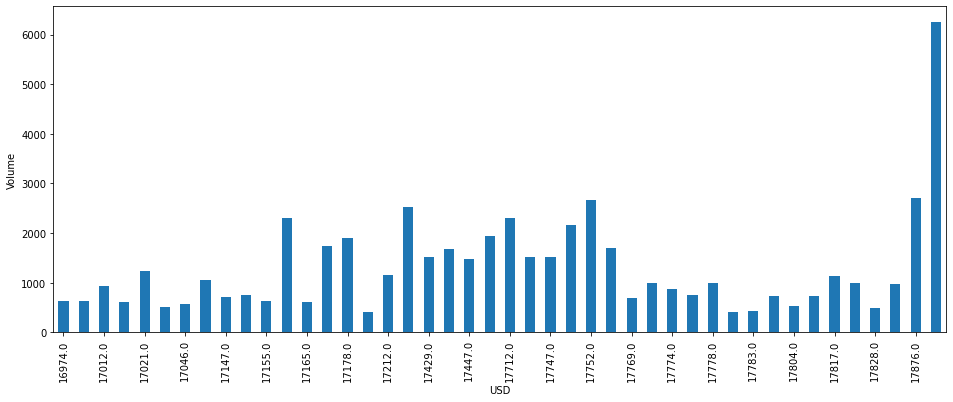

In [4]:
mp = MarketProfile(candles, tick_size=1)
mp_slice = mp[candles.index.min():candles.index.max()]

plt.figure(figsize=(16, 6))
data = mp_slice.profile
data.plot(kind='bar')
plt.xlabel('USD')
plt.ylabel('Volume')
plt.locator_params(axis='x', nbins=25)
plt.show()

In [5]:
print('periodo:', candles.index[0], '-', candles.index[-1])
print('bilancio iniziale: %f, %f' % mp_slice.initial_balance())
print('intervallo di apertura: %f, %f' % mp_slice.open_range())
print('POC: %f' % mp_slice.poc_price)
print('profilo: %f, %f' % mp_slice.profile_range)
print('area di valore: %f, %f' % mp_slice.value_area)
print('target bilanciato: %f' % mp_slice.balanced_target)

periodo: 2022-12-12 13:00:00 - 2022-12-14 11:00:00
bilancio iniziale: 16961.430000, 17053.890000
intervallo di apertura: 16961.430000, 17006.490000
POC: 17903.000000
profilo: 16974.000000, 17903.000000
area di valore: 17395.000000, 17903.000000
target bilanciato: 18832.000000


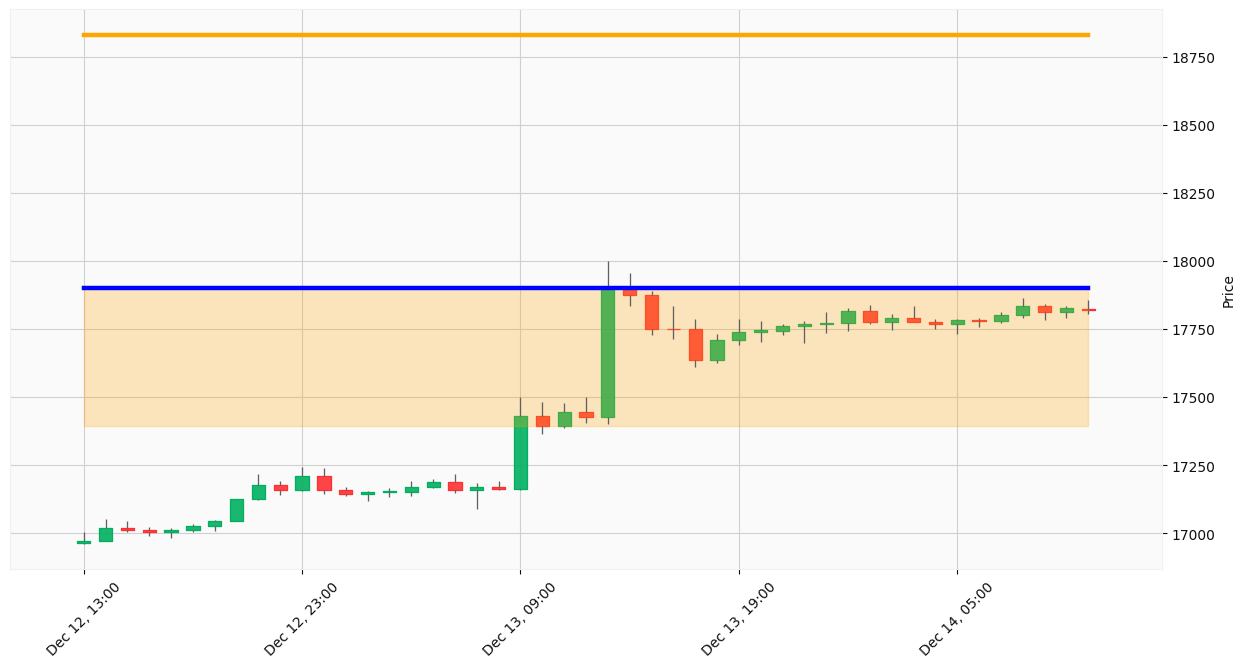

In [6]:
balanced_target_plot = mpf.make_addplot([mp_slice.balanced_target] * len(candles), color='orange')
poc_price_plot = mpf.make_addplot([mp_slice.poc_price] * len(candles), color='blue')

mpf.plot(
    candles,
    addplot=[balanced_target_plot, poc_price_plot],
    type='candle',
    style='yahoo',
    figsize=(16, 8),
    fill_between=dict(y1=mp_slice.value_area[0], y2=mp_slice.value_area[1], alpha=0.25, color='orange')
)